# Watson Studio Demo

## Import libraries

In [39]:
import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt

# Data Visualization
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
plt.rc("font", size=14)

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

## Link object storage 

In [40]:
# The code was removed by Watson Studio for sharing.

## Load Dataset

In [41]:
data = pd.read_csv(body)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  Desciptive Analysis

### Missing values

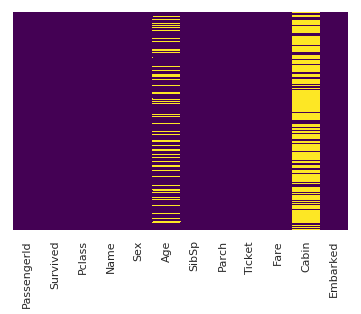

In [42]:
# see missing data
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [43]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data visualization

### Survivors by Class

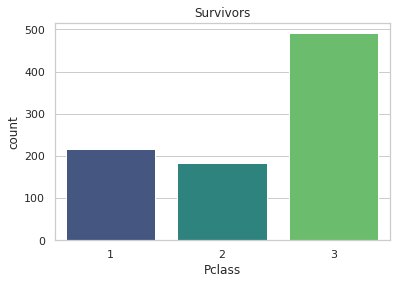

In [45]:
sns.countplot(x = 'Pclass', data = data, palette = 'viridis')
plt.title('Survivors')
plt.show()

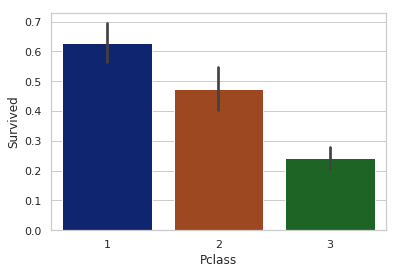

In [46]:
sns.barplot(x = 'Pclass', y = 'Survived', data = data, palette = "dark")
plt.show()

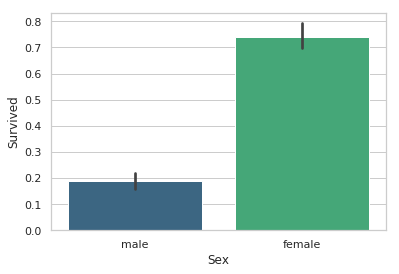

In [47]:
sns.barplot(x = 'Sex', y = 'Survived', data = data, palette = "viridis")
plt.show()

### Plot survivors by Class and Sex

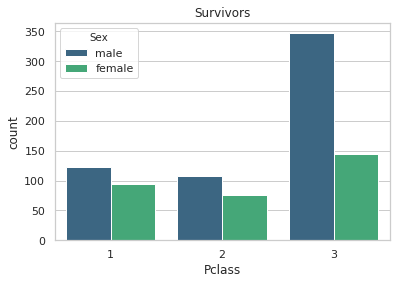

In [48]:
sns.countplot(x = 'Pclass', hue='Sex', data = data, palette = 'viridis')
plt.title('Survivors')
plt.show()

### Plot survivors by Age

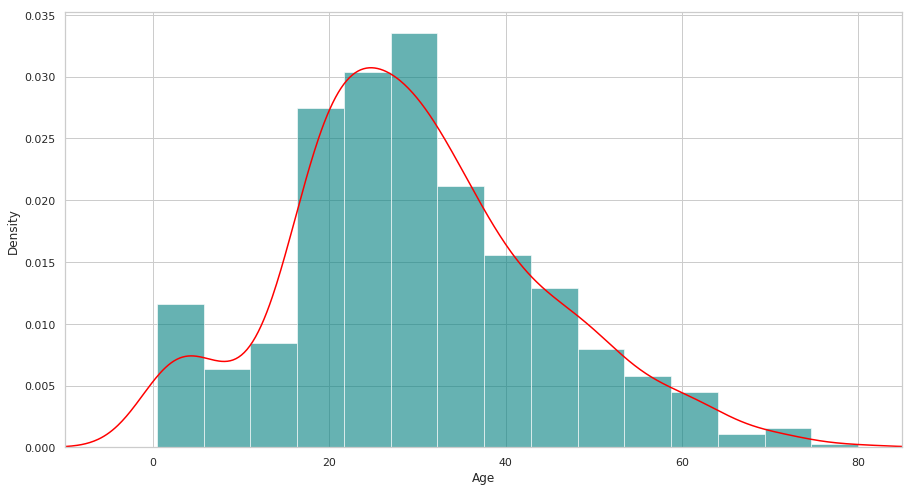

In [49]:
plt.figure(figsize=(15,8))

ax = data["Age"].hist(bins = 15, density = True, stacked = True, color = 'teal', alpha = 0.6)
data["Age"].plot(kind='density', color='red')

ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

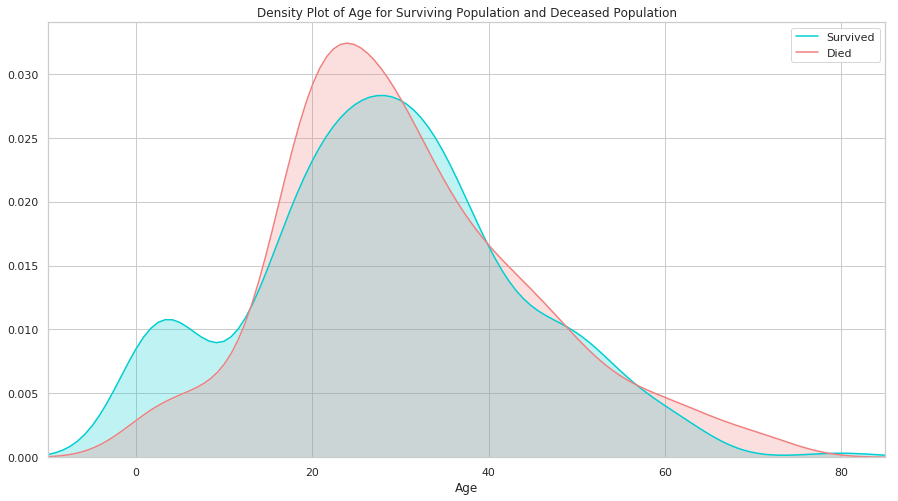

In [50]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(data["Age"][data.Survived == 1], color = "darkturquoise", shade = True)
sns.kdeplot(data["Age"][data.Survived == 0], color = "lightcoral", shade = True)

plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel = 'Age')

plt.xlim(-10,85)
plt.show()

### Impute Age

In [51]:
# If "Age" is missing, impute with 28 (median age)

data["Age"].fillna(data["Age"].median(skipna = True), inplace = True)

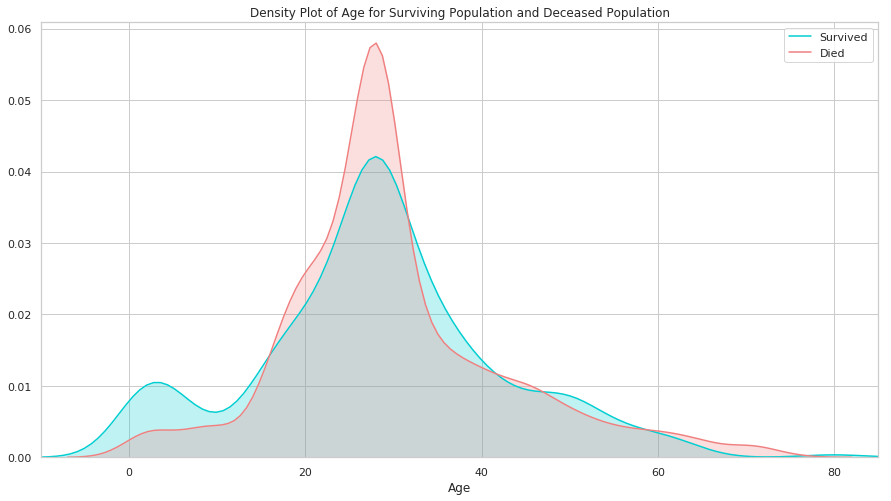

In [52]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(data["Age"][data.Survived == 1], color = "darkturquoise", shade = True)
sns.kdeplot(data["Age"][data.Survived == 0], color = "lightcoral", shade = True)

plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel = 'Age')

plt.xlim(-10,85)
plt.show()

## Encode categorical variable

In [53]:
# Create categorical variable for traveling alone

data['TravelAlone'] = np.where((data["SibSp"] + data["Parch"]) > 0, 0, 1)

data.drop('SibSp', axis = 1, inplace = True)
data.drop('Parch', axis = 1, inplace = True)

In [54]:
# create categorical variables and drop some variables

finalData = pd.get_dummies(data, columns = ["Pclass","Embarked","Sex"])
finalData.drop('Sex_female', axis = 1, inplace = True)
finalData.drop('PassengerId', axis = 1, inplace = True)
finalData.drop('Name', axis = 1, inplace = True)
finalData.drop('Ticket', axis = 1, inplace = True)

# remove cabin variable
finalData.drop('Cabin', axis = 1, inplace = True)

dataset = finalData
dataset.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


## Split dataset

In [55]:
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male"] 
X = dataset[cols]
y = dataset['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) #splitting the data as train and test

## Create and Train model

In [56]:
model = LogisticRegression()

model.fit(X, y)

pred = model.predict(X_test)

## Model Evaluation

### Accuracy score

In [23]:
print(metrics.accuracy_score(y_test, pred))

0.7821229050279329


### ROC curve


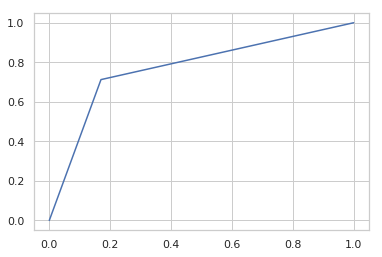

In [24]:
pr, tpr, thr = metrics.roc_curve(y_test, pred)

plt.plot(pr,tpr)
plt.show()

## Manual Inference

In [25]:
tab = [ [34.5, 7.8292, 0, 0, 0, 0, 0, 1] ]
df = pd.DataFrame(tab, columns = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male"])

In [26]:
pred = model.predict_proba(tab)

In [27]:
print(pred)

[[0.90204793 0.09795207]]


In [28]:
pred = model.predict(tab)
print(pred)

[0]


## Save and Deploy model to Watson Machine Learning 

In [35]:
# The code was removed by Watson Studio for sharing.

1.0.375


In [36]:
#Specify the Properties
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "TeamWatson",
              client.repository.ModelMetaNames.AUTHOR_EMAIL: "",
              client.repository.ModelMetaNames.NAME: "DemoWCS"}
#Store the Machine Learning Model
model_artifact = client.repository.store_model(model, meta_props = model_props)

In [38]:
#Get model UID
published_model_uid = client.repository.get_model_uid(model_artifact)#Deploy the model

#Deploy the model
created_deployment = client.deployments.create(published_model_uid, name = "MyDeployment")



#######################################################################################

Synchronous deployment creation for uid: '8d13c736-9b0c-4f7b-bea3-042c80e8569e' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='94bbc024-92b2-43d2-9a8a-946c0666ad55'
------------------------------------------------------------------------------------------------




#######################################################################################

Synchronous deployment creation for uid: '8d13c736-9b0c-4f7b-bea3-042c80e8569e' started

#######################################################################################


INITIALIZING
DEPLOY_IN_PROGRESS..........................................................................................................

KeyboardInterrupt: 